,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,CC()c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5c...,NaN,0.370410,NaN,NaN,NaN
2,388772,Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(S...,NaN,0.378860,NaN,NaN,NaN
3,519416,Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N)c(...,NaN,0.387324,NaN,NaN,NaN
4,539187,Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N+...,NaN,0.355470,NaN,NaN,NaN


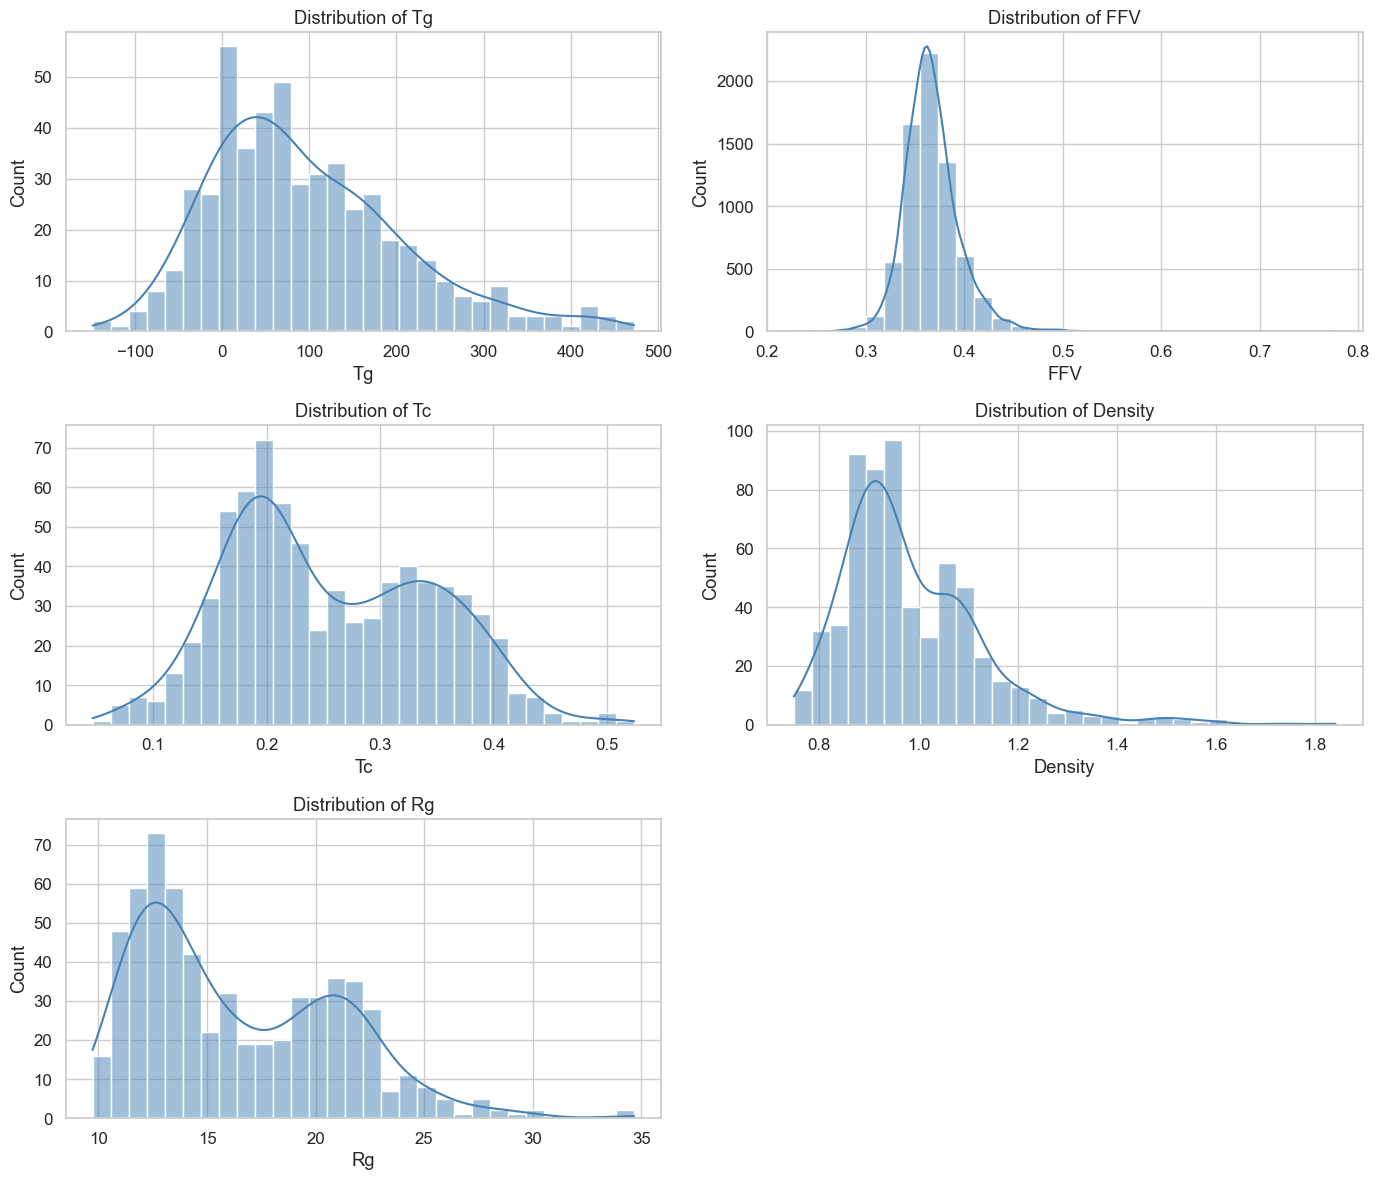

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv("train.csv")  # replace with your actual path

# Clean SMILES (optional): remove leading '*' and replace 'N*' or 'O*' with placeholders
df['SMILES'] = df['SMILES'].str.replace(r'\*', '', regex=True)
df['SMILES'] = df['SMILES'].str.replace(r'N\*', 'N', regex=True)
df['SMILES'] = df['SMILES'].str.replace(r'O\*', 'O', regex=True)

# Preview the cleaned dataframe
display(df.head())

# Convert numerical columns, in case they were read as strings
target_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
df[target_cols] = df[target_cols].apply(pd.to_numeric, errors='coerce')

# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot histograms of each target property
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplot if target_cols < number of axes
for j in range(len(target_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


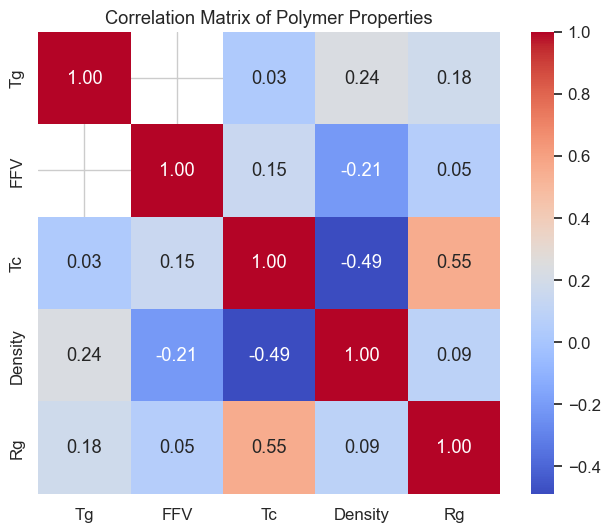

In [2]:
# Compute correlation matrix
corr = df[target_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Polymer Properties")
plt.show()
